<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/event_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 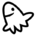 [ Bokchi lab event ]강아지와 고양이를 AI 모델을 통해 분류해보세요 ! 
☝ 복치랩의 실험환경을 이용해서 더 똑똑하게 만들어 보세요!

❗  <font color='red'>채점을 위해 작성한 코드를 저장해주세요.</font> (고득점이신 분께 별도로 제출요청 드릴 예정입니다.) 
  
  : 파일 -> 다운로드 -> ipynb 다운로드

   : 정확도가 높은 분들의 소스를 받아서 채점용 테스트 데이터를 통해 최종 정확도를 산출할 예정입니다. 

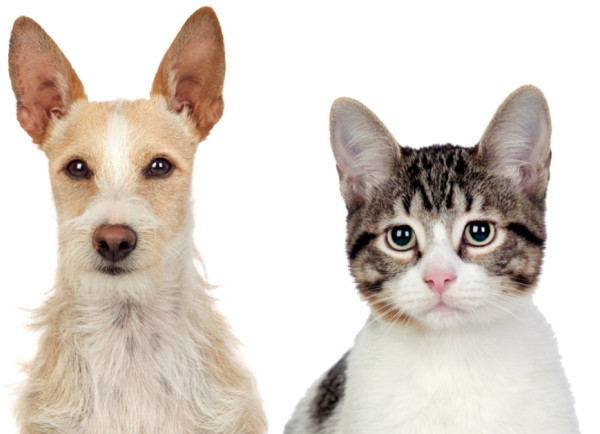

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [1]:
pip install deepdriver==1.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 958.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42913 sha256=35ee5b64689c8e7d90343bb47ede055162377929e7f479a093b5185d95778575
  Stored in directory: /root/.cache/pip/wheels/af/56/e7/175b60f695bb1520ccdcc66a6d0dbdbf124f6e14cad04703c9
Successfully built assertpy


#1. ➕ import deepdriver & deeplearnig framework



In [2]:
import tensorflow as tf

In [3]:
import deepdriver

#2. 🔌 log in to deepdriver

In [38]:
deepdriver.login_with()

Combobox(value='', description='Choose : ', ensure_option=True, options=('google', 'email'), placeholder='--se…

In [4]:
deepdriver.login()

Please go to this URL: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=1083953718757-uu062r3d7243he1nat9fourmjfg9kskp.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.profile+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=Gvb2kjXfUMj37IDGWEgQYhQyL73d2g&prompt=consent&access_type=offline
Enter the authorization code: 4/1AbUR2VOjXxbD1Wn4ETD3fV_HPSZBMspdfawJ6eb8HR0-ri2pexO9ZngdLsc


True

#3. prepare dataset

In [5]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import opendatasets as od

In [7]:
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: molamolasojeong
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:01<00:00, 126MB/s]


In [8]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)

data_dir ='/content/cat-and-dog/training_set/training_set/'
data_dog_dir=data_dir+'dogs'
data_cat_dir=data_dir+'cats'
valid_dir ='/content/cat-and-dog/test_set/test_set/'
data_dog_valid_dir=valid_dir+'dogs'
data_cat_valid_dir=valid_dir+'cats'

In [9]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [10]:
# image file name list 생성
import shutil
dog_files = [file for file in os.listdir(data_dog_dir)]
cat_files = [file for file in os.listdir(data_cat_dir)]
total_data_count = len(dog_files)
train_data_count =int(total_data_count*0.7)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count


 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_dog_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_dog_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_dog_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [11]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [12]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 2804
Total training dog images : 2804
Total validation cat images : 400
Total validation dog images : 400
Total test cat images : 797
Total test dog images : 802


#4. 🥼 create experiment and run

In [23]:
experiment_name="cat_dog_cnn"

In [24]:
artifact_name ="cat_dog_cnn_model"

In [25]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 30, 'batch_size': 64, 'hidden_layer':128, 'learning_rate': 0.001})

DeepDriver initialized
Team Name=_mola.sojeong.gmail
Exp Name=cat_dog_cnn
Run Name=run_7
Run URL=https://board.bokchi.com/_mola.sojeong.gmail/cat_dog_cnn/runs/run_7/charts


#5. 📚 train your code and send log

모델 구조를 만듭니다!

In [26]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(deepdriver.config.hidden_layer, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [27]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=deepdriver.config.learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

학습에 사용할 데이터를 로드합니다.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                  batch_size=deepdriver.config.batch_size,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 5606 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 1599 images belonging to 2 classes.


학습하는 동안 deepdriver.log()를 통해 로그를 서버로 전송합니다.

In [29]:
class CustomCallback(tf.keras.callbacks.Callback):

    # 하기 코드는 삭제/변경 하지 말것

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        global final_val_acc
        final_val_acc =  logs["val_accuracy"]


모델을 학습합니다.!!!

In [30]:
steps_per_epoch = train_generator.n//deepdriver.config.batch_size

In [31]:
validation_steps = validation_generator.n//deepdriver.config.batch_size

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/30


#6. finish run
브라우저에서 로그인 후 아래 report url로 들어가보세요.

아래 report url 을 복사해서 discord에 제출 하시면 됩니다.!!

In [ ]:
deepdriver.finish()

#7. ⛳  validation accuracy 확인 <font color ="red">(최종 제출 점수 입니다)</font>

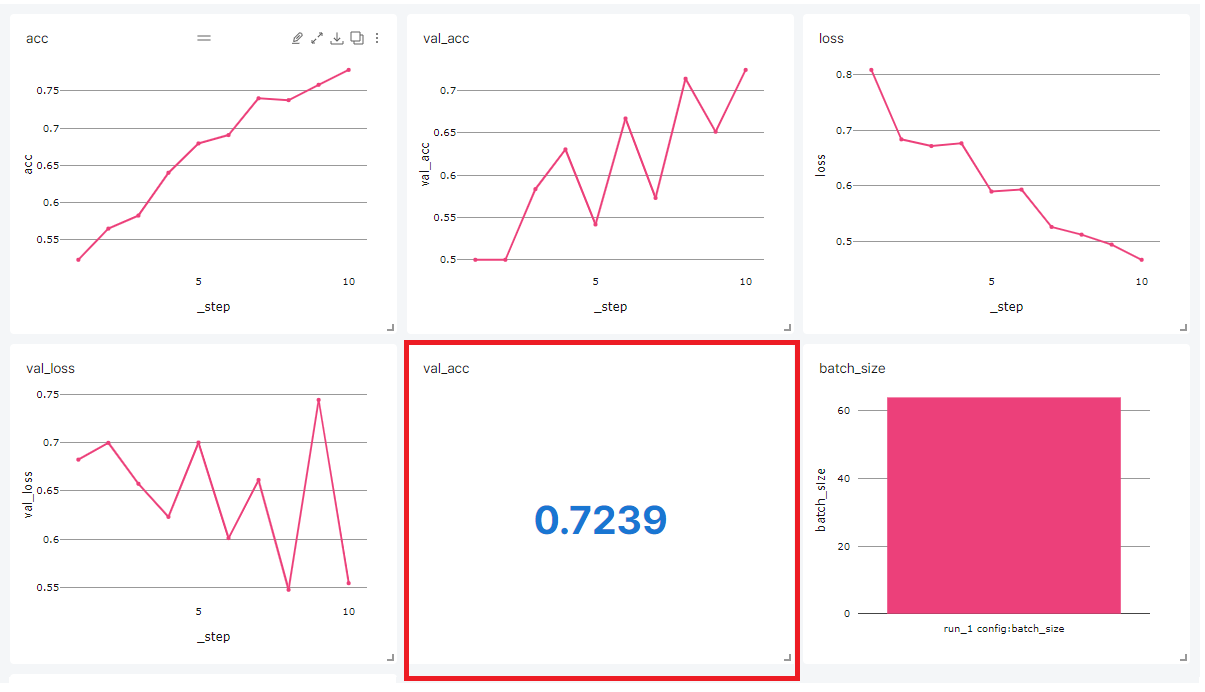

아래의 값이 최종 정확도로 제출 됩니다.

❗ 여러번 수행하신 경우 리포트에 표시된 값 (가장 높은 정확도)로 제출됩니다.

In [ ]:
print(final_val_acc)

#8. 🧪 test

실제 채점에 사용되는 이미지는 별도로 있습니다.!!

In [ ]:
scores = model.evaluate_generator(test_generator)

In [ ]:
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#8. ❓ predict
테스트 이미지를 선택해서 예측 결과를 확인 할 수 있습니다.

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
dog_test_file_list =[dog_file for dog_file in os.listdir(test_set_dir+"/dog")]


In [ ]:
cat_test_file_list =[cat_file for cat_file in os.listdir(test_set_dir+"/cat")]

In [ ]:
def load_image(filename):
 # load the image
 img = load_img(filename, target_size=(224, 224))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 3 channels
 img = img.reshape(1, 224, 224, 3)
 # center pixel data
 img = img.astype('float32')
 img = img - [123.68, 116.779, 103.939]
 return img

In [ ]:
def index_to_label(idex):
  if idex == 0 :
    return "고양이"
  else:
    return "강아지"

In [ ]:
def predict_image_idex( dog_or_cat , idx):
  if dog_or_cat == "dog":
    file_name = dog_test_file_list[idx]
  else:
    file_name = cat_test_file_list[idx]
  image_path = "cat_dog/test_set/"+dog_or_cat+"/"+file_name
  im = Image.open(image_path) 
  im.show()
  image = tf.keras.utils.load_img(image_path,target_size=(150, 150))
  input_arr = tf.keras.utils.img_to_array(image)
  input_arr = np.array([input_arr])
  predict_array = model.predict(input_arr)
  return index_to_label(int(predict_array[0]))

강아지 그림을 예측 해보려면 predict_image_idex("dog",0~99사이의 숫자)

In [ ]:
predict_image_idex("dog",99)

고양이 그림을 예측 해보려면 predict_image_idex("cat",0~99사이의 숫자)

In [ ]:
predict_image_idex("cat",99)